In [35]:
from src.LogLossAccuracy import LogLossAccuracy
from src.DFclosedform import DFL
from src.TwoStageLogReg import TwoStage
from src.LPopt import LPOpt
from src.project_dirs import *
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [33]:
filepath = str(raw_data_root() / "adult_reconstruction.csv")
df = pd.read_csv(filepath)
all_cols = df.columns.tolist()
print("All columns", df.columns)
print("Original shape", df.shape)
print("Missing values in columns", df.isnull().sum())
df.dropna(inplace=True)
print("Shape after dropping NA", df.shape)
target = 'income'
numeric_feat = ['hours-per-week', 'age', 'capital-gain', 'capital-loss', 'education-num']
categorical_feat = ['occupation', 'workclass', 'education', 'marital-status', 'relationship', \
                'race', 'gender', 'native-country']

# minmax scale the numeric_feat
scaler = MinMaxScaler()
df[numeric_feat] = scaler.fit_transform(df[numeric_feat])

# one hot encode the categorical_feat
df = pd.get_dummies(df, columns=categorical_feat, drop_first=True)

# change the target to -1 and 1, if >=50k then 1, else -1
# df[target] = df[target].apply(lambda x: 1 if x>=50000 else -1)

# split the data into train and test, take 10k random samples for train and 10k for test, 
# create a function that can do this
 


All columns Index(['hours-per-week', 'age', 'capital-gain', 'capital-loss', 'workclass',
       'education', 'education-num', 'marital-status', 'relationship', 'race',
       'gender', 'native-country', 'income', 'occupation'],
      dtype='object')
Original shape (49531, 14)
Missing values in columns hours-per-week    0
age               0
capital-gain      0
capital-loss      0
workclass         0
education         0
education-num     0
marital-status    0
relationship      0
race              0
gender            0
native-country    0
income            0
occupation        0
dtype: int64
Shape after dropping NA (49531, 14)


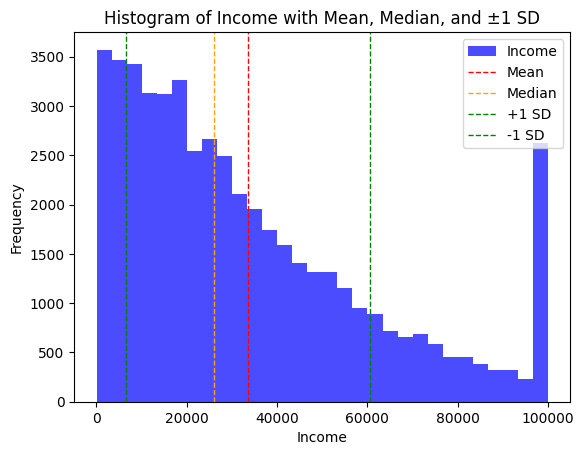

In [37]:
# also add median income
# Calculate mean, median, and standard deviation
mean = df[target].mean()
median = df[target].median()
std = df[target].std()

# Plot histogram
plt.hist(df[target], bins=30, alpha=0.7, color='blue', label='Income')

# Add mean, median, and ±1 standard deviation lines
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median, color='orange', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(mean + std, color='green', linestyle='dashed', linewidth=1, label='+1 SD')
plt.axvline(mean - std, color='green', linestyle='dashed', linewidth=1, label='-1 SD')

# Add labels and legend
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income with Mean, Median, and ±1 SD')
plt.legend()

# Show plot
plt.show()

In [38]:
df[target].describe()

count    49531.000000
mean     33509.843129
std      27051.436074
min        107.000000
25%      12027.000000
50%      26013.000000
75%      48457.500000
max      99999.000000
Name: income, dtype: float64

In [41]:
(df[target]>=50000).sum() / df.shape[0] * 100

np.float64(23.89412691041974)

# UCIs adult income dataset

In [42]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
df = adult.data.features
y = adult.data.targets

# Drop rows with missing values

print("initial", df.shape)

df_cleaned = df.dropna(inplace=True)

print("after dropna", df_cleaned.shape, df.shape)
y_cleaned = y.loc[df_cleaned.index]

# Change target values
y_cleaned['income'] = y_cleaned['income'].apply(lambda x: 1 if x == '>50K' else -1)

# Identify numerical and categorical columns
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns

# Min-max scale numerical features
scaler = MinMaxScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

# Print the shapes of the processed dataframes
print("\nShape of features after preprocessing:", df_encoded.shape)
print("Shape of target after preprocessing:", y_cleaned.shape)

# Display the first few rows of the processed dataframes
print("\nFirst few rows of processed features:")
print(df_encoded.head())
print("\nFirst few rows of processed target:")
print(y_cleaned.head())

initial (48842, 14)


/tmp/ipykernel_1763590/3125866946.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned = df.dropna(inplace=True)


AttributeError: 'NoneType' object has no attribute 'shape'

In [22]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
df = adult.data.features
y = adult.data.targets

type(df), type(y)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [49]:
y['income']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
48837    <=50K.
48838    <=50K.
48839    <=50K.
48840    <=50K.
48841     >50K.
Name: income, Length: 48842, dtype: object

In [52]:
(y['income'] == '>50K').sum() / y.shape[0] * 100

np.float64(16.053806150444288)